## Подвариант 1 (задача Коши): табл 1 - 3, табл 2 - 12; Подвариант 2 (краевая задача): 9

In [2]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# некоторые элементарные функции
from math import exp, sqrt, tan, atan, cos, sin, log
# библиотека для вывода графиков функции
%matplotlib inline
import matplotlib.pyplot as plt

# разбить [start, stop) на n равных отрезков
def arange(start, stop, n): 
    step = (stop - start) / n
    return [round(x*step, 10) for x in range(int(start/step), int(stop/step))]

# нарисовать график
def draw(X, Y, marker='', cl=None, lw=1):
    plt.plot(X, Y, marker, color=cl, linewidth = lw)

# правая часть дифф. уравнения
def f(x, y):
    return -y-x**2

# точное решение дифф. уравнения
def ans1(x):
    return -x**2+2*x-2+12*exp(-x)

# метод Рунге-Кутты 2го порядка
def runge_2(f, a, b, y0, n):
    h = (b - a)/n # диаметр разбиения
    x = a # x0
    y = y0 # начальное условие
    X = [x] # вектор x, сетка
    Y = [y] # вектор y, сеточная функция
    for i in range(0, n):
        x = a + h*i
        y = y + h/2*(f(x,y)+f(x+h, y+f(x,y)*h))
        X.append(x+h)
        Y.append(y)
    return X, Y


### Рунге 2 порядка

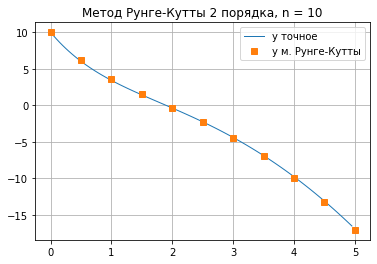

In [4]:
y0 = 10
a = 0
b = 5
n = 10
# Ответ
X = arange(a, b, 100)
Y = list(map(ans1, X))
draw(X, Y)
# Численное решение
r2 = runge_2(f, a, b, y0, n)
draw(r2[0], r2[1], 's')

plt.legend(['y точное', 'y м. Рунге-Кутты'])
plt.title('Метод Рунге-Кутты 2 порядка, n = %d' % n)
plt.grid() 

### Рунге 4 порядка

In [5]:
def runge_4(f, a, b, y0, n):
    h = (b - a)/n
    x = a
    y = y0
    Y = [y]
    X = [x]
    for i in range(0, n):
        x = a + h*i
        k1 = f(x, y)
        k2 = f(x+h/2,y+h/2*k1)
        k3 = f(x+h/2,y+h/2*k2)
        k4 = f(x+h,y+h*k3)
        y = y + h/6*(k1+2*k2+2*k3+k4)
        X.append(x+h)
        Y.append(y)
    return X, Y

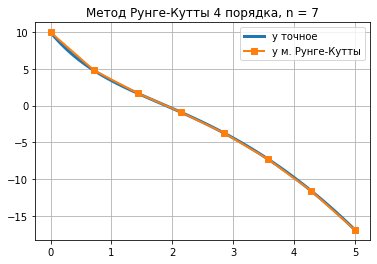

In [16]:
y0 = 10
a = 0
b = 5
n = 7
# Ответ
X = arange(a, b, 100)
Y = list(map(ans1, X))
draw(X, Y, lw=3)
# Численное решение
r2 = runge_4(f, a, b, y0, n)
draw(r2[0], r2[1], 's-', lw=2)

plt.legend(['y точное', 'y м. Рунге-Кутты'])
plt.title('Метод Рунге-Кутты 4 порядка, n = %d' % n)
plt.grid() 

### Рунге 2 для системы 

In [162]:
def f1(x, u, v):
    return -2*x*u**2+v**2-x-1

def f2(x, u, v):
    return 1/(v**2)-u-x/u

# (x0, y1(0), y2(0)) = (0, 1, 1)

def runge_2s(f1, f2, a, b, y01, y02, n):
    h = (b - a)/n # диаметр разбиения
    x = a # x0
    y1 = y01 # начальные условия
    y2 = y02 # начальные условия
    Y1 = [y1] # сеточная функция y1
    Y2 = [y2] # сеточная функция y2
    X = [x] # сетка
    # реализация рекуррентного соотношения
    for i in range(0, n-1): 
        x = a + h*i
        y1_n = y1 + h/2*(f1(x, y1, y2)+f1(x+h, y1+f1(x,y1,y2)*h, y2+f2(x,y1,y2)*h))
        y2_n = y2 + h/2*(f2(x, y1, y2)+f2(x+h, y1+f1(x,y1,y2)*h, y2+f2(x,y1,y2)*h))
        y1 = y1_n
        y2 = y2_n
        X.append(x+h)
        Y1.append(y1)
        Y2.append(y2)
    return X, Y1, Y2


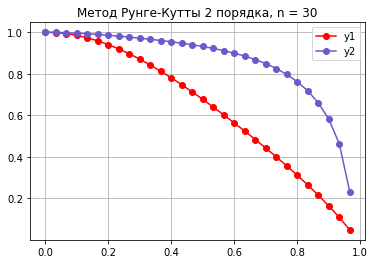

In [165]:
y01 = 1
y02 = 1
a = 0
b = 1
n = 30

# Численное решение
r2 = runge_2s(f1, f2, a, b, y01, y02, n)
draw(r2[0], r2[1], 'o-', color='red')
draw(r2[0], r2[2],marker='o-',color='slateblue')

plt.legend(['y1', 'y2'])
plt.title('Метод Рунге-Кутты 2 порядка, n = %d' % n)
plt.grid() 

Проверка на 1ом тесте 2ой таблицы

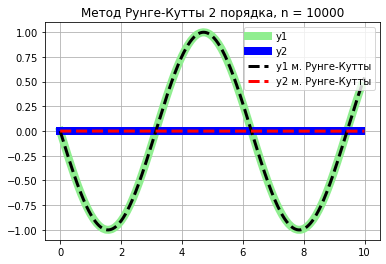

In [34]:
def f1(x, u, v):
    return (u-v)/x

def f2(x, u, v):
    return (u+v)/x

def g1(x, u, v):
    return v-cos(x)
def g2(x, u, v):
    return u+sin(x)
def gans1(x):
    return -sin(x)
def gans2(x):
    return 0

# (x0, y1(0), y2(0)) = (1, 1, 1)

def runge_2s(f1, f2, a, b, y01, y02, n):
    h = (b - a)/n
    x = a
    y1 = y01
    y2 = y02
    Y1 = [y1]
    Y2 = [y2]
    X = [x]
    for i in range(0, n):
        x = a + h*i
        y1_n = y1 + h/2*(f1(x, y1, y2)+f1(x+h, y1+f1(x,y1,y2)*h, y2+f2(x,y1,y2)*h))
        y2_n = y2 + h/2*(f2(x, y1, y2)+f2(x+h, y1+f1(x,y1,y2)*h, y2+f2(x,y1,y2)*h))
        y1 = y1_n
        y2 = y2_n
        X.append(x+h)
        Y1.append(y1)
        Y2.append(y2)
    return X, Y1, Y2

def ans1(x):
    return x*(cos(log(x))-sin(log(x)))

def ans2(x):
    return x*(cos(log(x))+sin(log(x)))

y01 = 0
y02 = 0
a = 0
b = 10
n = 10000

# Ответ
# Ответ
X = arange(a, b, 100)
draw(X, list(map(gans1, X)), '-', 'lightgreen', 8)
draw(X, list(map(gans2, X)), '-', 'blue', 8)

# Численное решение
r2 = runge_2s(g1, g2, a, b, y01, y02, n)
draw(r2[0], r2[1], '--', 'black', 3)
draw(r2[0], r2[2],'--', 'red', 3)

plt.legend(['y1', 'y2', 'y1 м. Рунге-Кутты', 'y2 м. Рунге-Кутты'])
plt.title('Метод Рунге-Кутты 2 порядка, n = %d' % n)
plt.grid() 

### Рунге 4 для системы

In [35]:
def f1(x, u, v):
    return -2*x*u**2+v**2-x-1

def f2(x, u, v):
    return 1/(v**2)-u-x/u

# (x0, y1(0), y2(0)) = (0, 1, 1)

def runge_4s(f1, f2, a, b, y01, y02, n):
    h = (b - a)/n
    x = a
    y1 = y01
    y2 = y02
    Y1 = [y1]
    Y2 = [y2]
    X = [x]
    for i in range(0, n-1):
        x = a + h*i
        k11 = f1(x, y1, y2)
        k12 = f2(x, y1, y2)
        k21 = f1(x+h/2, y1+h/2*k11, y2+h/2*k12)
        k22 = f2(x+h/2, y1+h/2*k11, y2+h/2*k12)
        k31 = f1(x+h/2, y1+h/2*k21, y2+h/2*k22)
        k32 = f2(x+h/2, y1+h/2*k21, y2+h/2*k22)
        k41 = f1(x+h, y1+h*k31, y2+h*k32)
        k42 = f2(x+h, y1+h*k31, y2+h*k32)
        y1 = y1 + h/6*(k11+2*k21+2*k31+k41)
        y2 = y2 + h/6*(k12+2*k22+2*k32+k42)
        
        X.append(x+h)
        Y1.append(y1)
        Y2.append(y2)
        
        
    return X, Y1, Y2


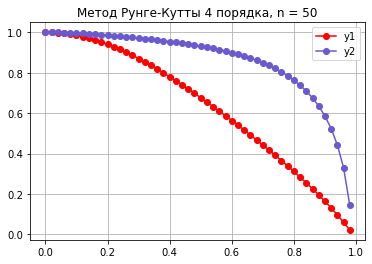

In [126]:
y01 = 1
y02 = 1
a = 0
b = 1
n = 50

# Ответ
# X = arange(a, b, 100)
# Y = list(map(ans1, X))
# draw(X, Y)

# Численное решение
r2 = runge_4s(f1, f2, a, b, y01, y02, n)
draw(r2[0], r2[1], 'o-', color='red')
draw(r2[0], r2[2], 'o-',color='slateblue')

plt.legend(['y1', 'y2'])
plt.title('Метод Рунге-Кутты 4 порядка, n = %d' % n)
plt.grid() 

Проверка на примере 1 таблицы 1

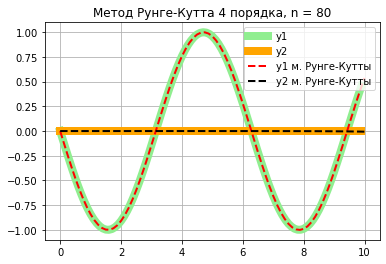

In [48]:
def f1(x, u, v):
    return (u-v)/x

def f2(x, u, v):
    return (u+v)/x
def g1(x, u, v):
    return v-cos(x)
def g2(x, u, v):
    return u+sin(x)
def gans1(x):
    return -sin(x)
def gans2(x):
    return 0
# (x0, y1(0), y2(0)) = (1, 1, 1)

def runge_4s(f1, f2, a, b, y01, y02, n):
    h = (b - a)/n
    x = a
    y1 = y01
    y2 = y02
    Y1 = [y1]
    Y2 = [y2]
    X = [x]
    for i in range(0, n):
        x = a + h*i
        k11 = f1(x, y1, y2)
        k12 = f2(x, y1, y2)
        k21 = f1(x+h/2, y1+h/2*k11, y2+h/2*k12)
        k22 = f2(x+h/2, y1+h/2*k11, y2+h/2*k12)
        k31 = f1(x+h/2, y1+h/2*k21, y2+h/2*k22)
        k32 = f2(x+h/2, y1+h/2*k21, y2+h/2*k22)
        k41 = f1(x+h, y1+h*k31, y2+h*k32)
        k42 = f2(x+h, y1+h*k31, y2+h*k32)
        y1 = y1 + h/6*(k11+2*k21+2*k31+k41)
        y2 = y2 + h/6*(k12+2*k22+2*k32+k42)
        
        X.append(x+h)
        Y1.append(y1)
        Y2.append(y2)
        
        
    return X, Y1, Y2

def ans1(x):
    return x*(cos(log(x))-sin(log(x)))

def ans2(x):
    return x*(cos(log(x))+sin(log(x)))

y01 = 0
y02 = 0
a = 0
b = 10
n = 80

# Ответ
X = arange(a, b, 100)
draw(X, list(map(gans1, X)), '-', 'lightgreen', 8)
draw(X, list(map(gans2, X)), '-', 'orange', 8)

# Численное решение
r2 = runge_4s(g1, g2, a, b, y01, y02, n)
draw(r2[0], r2[1], '--', 'red', 2)
draw(r2[0], r2[2],'--', 'black', 2)

plt.legend(['y1', 'y2', 'y1 м. Рунге-Кутты', 'y2 м. Рунге-Кутты'])
plt.title('Метод Рунге-Кутта 4 порядка, n = %d' % n)
plt.grid() 

### Краевая задача 
$y''-\frac{y'}{2}+3y=2x^2$<br />
$y(1) - 2 y'(1) = 0.6$ <br />
$y(1.3) = 1$ 

In [61]:
# данное уравнение - Вариант 9
# точное решение данного дифференциального решения
def ans(x): 
    c_1 = 0.469645
    c_2 = 0.618165
    y = c_1*exp(x/4)*sin((sqrt(47)*x)/4) + c_2*exp(x/4)*cos((sqrt(47)*x)/4) + (2*(x**2))/3 + (2*x)/9 - 11/27
    return y

# функции, описывающие данное дифференциальное уравнение
def p(x):
    return -1/2
def q(x):
    return 3
def f(x):
    return 2*(x**2)

# функция формирует и решает трехдиагональную систему краевой задачи
def boundary(p, q, f, sigma, gamma, delta, n, a = 1, b = 1.3): 
    h = (b-a)/n
    
    def A_func(x):
        return 1 - p(x)*h/2
    def C_func(x):
        return -2 + q(x)*(h**2)
    def B_func(x):
        return 1 + p(x)*h/2
    def F_func(x):
        return f(x)*(h**2)  
    
    # формирование коэффициентов трехдиагональной матрицы
    A = [A_func(a+i*h) for i in range(0, n+1)]
    B = [B_func(a+i*h) for i in range(0, n+1)]
    C = [C_func(a+i*h) for i in range(0, n+1)]
    F = [F_func(a+i*h) for i in range(0, n+1)]
    
    # задание краевых условий
    F[0] = delta[0]
    F[n] = delta[1]
    C[0] = sigma[0]-gamma[0]/h
    B[0] = gamma[0]/h
    A[n] = -gamma[1]/h
    C[n] = sigma[1]+gamma[1]/h
    
    # инициализация прогоночных коэффициентов
    alpha = [0]*n
    beta = [0]*n
    alpha[0] = -B[0]/C[0]
    beta[0] = F[0]/C[0]
    
    # рекуррентное вычисление всех прогоночных коэффициентов
    for i in range(1, n):
        alpha[i] = -B[i]/(A[i]*alpha[i-1]+C[i])
        beta[i] = (F[i]-A[i]*beta[i-1])/(C[i]+A[i]*alpha[i-1])
    
    # инициализация вектора неизвестных
    y = [0]*(n+1)
    y[n] = (F[n]-A[n]*beta[n-1])/(C[n]+A[n]*alpha[n-1])
    
    # рекуррентное вычисление неизвестных
    for i in reversed(range(0, n)):
        y[i] = alpha[i]*y[i+1]+beta[i]
    
    return y  

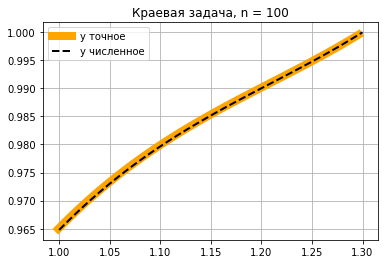

In [63]:
# вектора начальных условий
sigma = [1, 1]
gamma = [-2, 0]
delta = [0.6, 1]

a = 1
b = 1.3
n = 100
h = (b-a)/n

# точное решение
X = arange(a, b, 100)
Y = list(map(ans, X))
draw(X, Y, '-', 'orange', 8)

# численное решение
X = [a+i*h for i in range(0, n+1)]
y = boundary(p, q, f, sigma, gamma, delta, n, a, b)
draw(X , y, '--', 'black', 2)

plt.legend(['y точное', 'y численное'])
plt.title('Краевая задача, n = %d' % n)
plt.grid()

### Ещё какой-то тест
y'' + y' = 1, y'(0) = 0, y(1) = 1.

Точное решение: 𝑦(𝑥)=𝑥+𝑒^(-x)−1/e

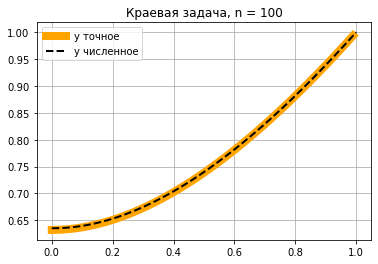

In [87]:
def p(x):
    return 1
def q(x):
    return 0
def f(x):
    return 1

def ans(x):
    return x+exp(-x)-1/exp(1)

sigma = [0, 1]
gamma = [1, 0]
delta = [0, 1]

a = 0
b = 1
n = 100

X = arange(a, b, 100)
Y = list(map(ans, X))
draw(X, Y, '-', 'orange', 8)

y = boundary(p, q, f, sigma, gamma, delta, n, a, b)
X = arange(a, b, n)
X.append(b)
draw(X, y, '--', 'black', 2)

# plt.xlim(0,0.5)
plt.legend(['y точное', 'y численное'])
plt.title('Краевая задача, n = %d' % n)
plt.grid()

Вариант 13

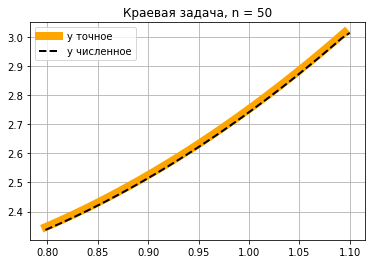

In [82]:
def p(x):
    return 2/x
def q(x):
    return -3
def f(x):
    return 2

def ans(x):
    # y(x) = -(0.0426075 e^(-sqrt(3) x))/x + (0.606253 e^(sqrt(3) x))/x - 0.666667
    return -0.0426075*exp(-sqrt(3)*x)/x + 0.606253*exp(sqrt(3)*x)/x-0.666667

sigma = [0, 2]
gamma = [1, -1]
delta = [1.5, 3]

a = 0.8
b = 1.1
n = 50

X = arange(a, b, 100)
Y = list(map(ans, X))
draw(X, Y, '-', 'orange', 8)

y = boundary(p, q, f, sigma, gamma, delta, n, a, b)
X = arange(a, b, n)
X.append(b)
draw(X, y, '--', 'black', 2)

plt.legend(['y точное', 'y численное'])
plt.title('Краевая задача, n = %d' % n)
plt.grid()